In [44]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.stats.diagnostic import kstest_normal
import statsmodels as sm
import statsmodels.formula.api as smf

# My script to get data from database
from data_getter_script import get_games, get_users, convert_to_pandas, convert_to_pandas_users

games = get_games()
df_games = convert_to_pandas(games)
users = get_users()
df_users = convert_to_pandas_users(users)

df = pd.merge(df_games, df_users, on="email", how='outer')

# Show dataframe
df.head()

,coordenacao,percepcao,repetiu,atencao,memoria,raciocinio,sono,exercicio,dia,sentimento,...,curso,sexo,experience,turma,region,best_raciocinio,best_memoria,best_atencao,best_coordenacao,best_percepcao
email,,,,,,,,,,,,,,,,,,,,,
adrian@maildrop.cc,19.2,24.2,True,36.0,21.0,12.0,≤6,0x,2023-06-14 18:26:58+00:00,Neutro,...,1.0,0.0,2.0,0.0,16,12.0,21.0,36.0,19.2,24.2
ana@maildrop.cc,7.4,29.7,True,7.0,40.0,15.0,7,3x,2023-06-14 17:44:00+00:00,Neutro,...,0.0,1.0,2.0,0.0,12,15.0,40.0,7.0,7.4,29.7
arubatu_ainshutain@maildrop.cc,49.4,98.1,True,64.0,29.0,21.0,≤6,≥4x,2023-06-13 23:39:58+00:00,Triste,...,0.0,0.0,2.0,0.0,15,21.0,29.0,64.0,49.4,98.1
bissiatti@maildrop.cc,30.3,48.9,True,7.0,18.0,7.0,7,1x,2023-06-12 10:08:28+00:00,Feliz,...,0.0,0.0,4.0,1.0,0,7.0,18.0,7.0,30.3,48.9
bruno_fornaro@maildrop.cc,44.4,60.8,True,30.0,38.0,18.0,8,3x,2023-06-08 23:23:27+00:00,Irritado,...,0.0,0.0,2.0,1.0,24,18.0,38.0,30.0,44.4,60.8


In [45]:
# Defines global constant
GAMES = ['Atenção', 'Coordenação', 'Memória', 'Percepção', 'Raciocínio']

# Limpando a base

In [46]:
# Delete rows with best_atencao as NaN (aka, users that didn't play the game)
df = df.dropna(subset=['best_atencao'])
df = df.reset_index()

df = df.rename(columns={
    'atencao': 'Atenção',
    'coordenacao': 'Coordenação',
    'memoria': 'Memória',
    'percepcao': 'Percepção',
    'raciocinio': 'Raciocínio'
})

df.shape

(64, 24)

# Existe correlação de desempenho entre os jogos?

In [47]:
fig = px.scatter_matrix(df, dimensions=GAMES,
                  hover_data=['email'],
                  color_continuous_scale='matter',
                  title='Matriz de dispersão entre os jogos')

fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.update_layout(
    width=1000,
    height=1000,
    font=dict(
        size=18
    ),
)

In [48]:
for i in range(len(GAMES)):
    for j in range(i+1, len(GAMES)):
        model = smf.ols(formula=GAMES[i]+' ~ '+GAMES[j], data=df)
        results = model.fit()

        print(GAMES[i], ' & ', GAMES[j], ' & ', end='')
        # print('Slope: $', round(results.params[1], 4), '\pm', round(results.conf_int()[1].values[1] - results.params[1], 2), '$')
        # print('Slope confidence interval 95%: ', results.conf_int()[0].values[1], ', ', results.conf_int()[1].values[1])
        # print('interval size: ', round(results.conf_int()[1].values[1] - results.params[1], 2))
        print('', round(results.rsquared, 4), ' & ', end='')
        print('', round(np.mean(np.abs(results.resid)), 4), ' \\\\ ', end='')
        print()

Atenção  &  Coordenação  &  0.2409  &  15.1599  \\ 
Atenção  &  Memória  &  0.1122  &  17.5977  \\ 
Atenção  &  Percepção  &  0.1902  &  16.2106  \\ 
Atenção  &  Raciocínio  &  0.0847  &  18.0289  \\ 
Coordenação  &  Memória  &  0.2276  &  13.8147  \\ 
Coordenação  &  Percepção  &  0.2596  &  13.0211  \\ 
Coordenação  &  Raciocínio  &  0.1118  &  14.1125  \\ 
Memória  &  Percepção  &  0.0885  &  11.5138  \\ 
Memória  &  Raciocínio  &  0.2024  &  10.8935  \\ 
Percepção  &  Raciocínio  &  0.1389  &  20.801  \\ 


In [49]:
fig = px.imshow(np.round(df[GAMES].corr(), 2), x=GAMES, y=GAMES,
          color_continuous_scale='matter',
          zmin=0, zmax=1,
          title='Correlação entre os jogos',
          text_auto=True)

fig.update_layout(
    font=dict(
        size=18
    ),
    width=1000,
    height=600,
)

# É possível modelar os resultados a partir de Gaussianas simples?

In [50]:
fig = px.violin(df, y=GAMES, box=True, points='all')
fig.update_traces(meanline_visible=True)
fig.update_layout(title='Distribuição das pontuações dos jogos',
                    xaxis_title='Jogos',
                    yaxis_title='Pontuação',
                    violinmode='group',
                    font=dict(
                        size=18
                    ),
)

In [51]:
for game in GAMES:
    print(f"{game} & ", end='')

    ksstat, pvalue = kstest_normal(df[game].dropna(), dist='norm')
    # print(f"Kolmogorov-Smirnov test: {ksstat}, {pvalue}")
    print(f"{round(ksstat, 4)} & {round(pvalue, 4)} \\\\", end='')
    # if pvalue > 0.05:
    #     print("Normal distribution")
    # else:
    #     print("Not normal distribution")
    
    print()

Atenção & 0.1548 & 0.0018 \\
Coordenação & 0.0737 & 0.6082 \\
Memória & 0.1202 & 0.0398 \\
Percepção & 0.1148 & 0.0585 \\
Raciocínio & 0.1185 & 0.0446 \\


In [52]:
# Plot the PMF of the scores
fig = go.Figure()
for game in GAMES:
    fig.add_trace(go.Histogram(x=df[game], histnorm='probability', name=game))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()

# Correlação entre desempenho e quantidade de sono

In [53]:
px.histogram(df, x='sono')

In [54]:
fig = px.box(df, y=GAMES, color='sono')
fig.update_layout(title='Distribuição das pontuações dos jogos por sono',
                    xaxis_title='Jogos',
                    yaxis_title='Pontuação',
                    font=dict(
                        size=18
                    ),
                    legend_title='Horas de sono'
)

In [68]:
df_sleep = df.copy()
df_sleep['safe_sleep'] = df_sleep['sono'].apply(lambda x: x in ['7', '8', '9'])

fig = px.box(df_sleep, y=GAMES, color='safe_sleep')
fig.update_layout(title='Distribuição das pontuações dos jogos por sono',
                    xaxis_title='Jogos',
                    yaxis_title='Pontuação',
                    font=dict(
                        size=18
                    ),
                    legend_title='Sono saudável'
)

In [72]:
for game in GAMES:
    model = smf.ols(formula=game+' ~ safe_sleep', data=df_sleep)
    results = model.fit()

    # print(f"Game: {game}")
    # # print(results.summary())
    # print('Intercept: ', results.params[0])
    # print('Slope: ', results.params[1])
    # print('Slope confidence interval 95%: ', results.conf_int()[0].values[1], ', ', results.conf_int()[1].values[1])
    # print('R2: ', results.rsquared)
    # print()

    print(f"{game} & ", end='')
    print(f"${round(results.params[1], 4)} \pm {round(results.conf_int()[1].values[1] - results.params[1], 2)}$ & ", end='')
    print(f"{round(results.rsquared, 3)} & ", end='')
    print(f"{round(np.mean(np.abs(results.resid)), 3)} \\\\", end='')
    print()


Atenção & $0.5789 \pm 11.91$ & 0.0 & 18.739 \\
Coordenação & $9.8939 \pm 10.19$ & 0.062 & 14.653 \\
Memória & $9.5329 \pm 8.19$ & 0.087 & 11.22 \\
Percepção & $19.5885 \pm 14.33$ & 0.116 & 19.376 \\
Raciocínio & $4.0118 \pm 5.86$ & 0.032 & 8.835 \\


# Correlação entre desempenho e experiência com jogos

In [74]:
px.histogram(df, x='experience')

df['experience'] = df['experience'].astype(int)

In [75]:
fig = px.box(df, y=GAMES, color='experience', 
                    category_orders={'experience': [0, 1, 2, 3, 4]})
fig.update_xaxes(categoryorder='array', categoryarray=[0, 1, 2, 3, 4])
fig.update_layout(title='Pontuação dos jogos por experiência com jogos',
                    xaxis_title='Experiência com jogos',
                    yaxis_title='Pontuação',
                    font=dict(
                        size=18
                    ),
                    legend_title_text='Exp. com jogos',
)

In [76]:
df_experience = df.copy()
df_experience['exp'] = df_experience['experience'].apply(lambda x: x > 1)

fig = px.box(df_experience, y=GAMES, color='exp')
fig.update_layout(title='Pontuação dos jogos por experiência com jogos',
                    xaxis_title='Experiência com jogos',
                    yaxis_title='Pontuação',
                    font=dict(
                        size=18
                    ),
                    legend_title='Exp. com jogos',
)

In [77]:
for game in GAMES:
    model = smf.ols(formula=game+' ~ exp', data=df_experience)
    results = model.fit()

    # print(f"Game: {game}")
    # print(results.summary())
    # print('Intercept: ', results.params[0])
    # print('Slope: ', results.params[1])
    # print('Slope confidence interval 95%: ', results.conf_int()[0].values[1], ', ', results.conf_int()[1].values[1])
    # print('R2: ', results.rsquared)
    # print()

    print(f"{game} & ", end='')
    print(f"${round(results.params[1], 4)} \pm {round(results.conf_int()[1].values[1] - results.params[1], 2)}$ & ", end='')
    print(f"{round(results.rsquared, 3)} & ", end='')
    print(f"{round(np.mean(np.abs(results.resid)), 3)} \\\\", end='')
    print()

Atenção & $4.1288 \pm 14.25$ & 0.006 & 18.57 \\
Coordenação & $9.5447 \pm 12.37$ & 0.04 & 14.929 \\
Memória & $5.7386 \pm 10.17$ & 0.022 & 11.29 \\
Percepção & $11.0995 \pm 18.05$ & 0.026 & 20.827 \\
Raciocínio & $6.125 \pm 6.96$ & 0.052 & 8.742 \\


# Comparando as pontuações da regiões 12 e 18 (MG e RJ)

In [83]:
df['region'] = df['region'].astype(str)
df_regions = df[(df['region'] == '12') | (df['region'] == '18')]
df_regions['region'] = df_regions['region'].apply(lambda x: 'Minas Gerais' if x == '12' else 'Rio de Janeiro')

fig = px.box(df_regions, y=GAMES, color='region')
fig.update_layout(title='Pontuação dos jogos por região',
                    xaxis_title='Região',
                    yaxis_title='Pontuação',
                    font=dict(
                        size=18
                    ),
                    legend_title='Região',
)

In [82]:
# count values
df_regions['region'].value_counts()

Minas Gerias      19
Rio de Janeiro    11
Name: region, dtype: int64

In [86]:
df_regions2 = df_regions.copy()
df_regions2['region'] = (df_regions2['region'] == 'Minas Gerais').astype(int)

for game in GAMES:
    model = smf.ols(formula=game+' ~ region', data=df_regions2)
    results = model.fit()

    # print(f"Game: {game}")
    # print(results.summary())
    # print('Intercept: ', results.params[0])
    # print('Slope: ', results.params[1])
    # print('Slope confidence interval 95%: ', results.conf_int()[0].values[1], ', ', results.conf_int()[1].values[1])
    # print('R2: ', results.rsquared)
    # print('MAPE: ', np.mean(np.abs(results.resid/results.fittedvalues)))
    # print()

    print(f"{game} & ", end='')
    print(f"${round(results.params[1], 4)} \pm {round(results.conf_int()[1].values[1] - results.params[1], 2)}$ & ", end='')
    print(f"{round(results.rsquared, 3)} & ", end='')
    print(f"{round(np.mean(np.abs(results.resid)), 3)} \\\\", end='')
    print()

Atenção & $15.0889 \pm 14.58$ & 0.148 & 12.84 \\
Coordenação & $12.3311 \pm 15.84$ & 0.09 & 15.198 \\
Memória & $16.0111 \pm 11.39$ & 0.243 & 10.938 \\
Percepção & $28.3057 \pm 19.42$ & 0.257 & 19.868 \\
Raciocínio & $3.1222 \pm 8.22$ & 0.023 & 8.091 \\


In [90]:
df_full = df.copy()
df_full = df_full.dropna()
df_full = df_full[(df_full['region'] == '12') | (df_full['region'] == '18')]
df_full['minas'] = (df_full['region'] == '12')
df_full['exp'] = df_full['experience'] > 1
df_full['safe_sleep'] = df_full['sono'].apply(lambda x: x in ['7', '8', '9'])
df_full.shape

for game in GAMES:
    df_full[game] = df_full[game].apply(lambda x: x if x > 0 else 0.0001)

In [ ]:
model = smf.glm(formula='atencao ~ coordenacao + memoria + percepcao + raciocinio + minas + safe_sleep', data=df_full, family=sm.api.families.Gamma())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                atencao   No. Observations:                   28
Model:                            GLM   Df Residuals:                       21
Model Family:                   Gamma   Df Model:                            6
Link Function:           InversePower   Scale:                         0.18899
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 26 Jun 2023   Deviance:                       73.549
Time:                        10:48:59   Pearson chi2:                     3.97
No. Iterations:                     7   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0362      0

c:\Users\lagua\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

c:\Users\lagua\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:812: RuntimeWarning:

divide by zero encountered in log

c:\Users\lagua\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1806: RuntimeWarning:

invalid value encountered in double_scalars



In [98]:
FORMULAS = [
    'Atenção ~ Coordenação + Memória + Percepção + Raciocínio',
    'Atenção ~ Coordenação + Memória + Percepção + Raciocínio + minas + safe_sleep',
    'Atenção ~ Coordenação + Memória + Percepção + Raciocínio + minas + safe_sleep + exp',
]

for formula in FORMULAS:
    model = smf.glm(formula=formula, data=df_full, family=families.Gamma(link=families.links.Log()))
    results = model.fit()
    print(results.aic)
    # print mse
    print(results.summary())

343.23571135304945
                 Generalized Linear Model Regression Results                  
Dep. Variable:                Atenção   No. Observations:                   28
Model:                            GLM   Df Residuals:                       23
Model Family:                   Gamma   Df Model:                            4
Link Function:                    Log   Scale:                         0.18725
Method:                          IRLS   Log-Likelihood:                -166.62
Date:                Tue, 27 Jun 2023   Deviance:                       25.993
Time:                        15:28:27   Pearson chi2:                     4.31
No. Iterations:                    17   Pseudo R-squ. (CS):             0.4892
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9564      0.2

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9564      0.247     11.971      0.000       2.472       3.440
Coordenação     0.0173      0.005      3.437      0.001       0.007       0.027
Memória        -0.0046      0.006     -0.716      0.474      -0.017       0.008
Percepção       0.0082      0.004      2.159      0.031       0.001       0.016
Raciocínio     -0.0096      0.009     -1.022      0.307      -0.028       0.009

In [ ]:
for formula in FORMULAS:
    model = smf.glm(formula=formula, data=df_full, family=families.Gamma(link=families.links.Log()))
    results = model.fit()
    
    print(f"{formula} & ", end='')
    print(f"${round(results.params[1], 4)} \pm {round(results.conf_int()[1].values[1] - results.params[1], 2)}$ & ", end='')
    print(f"{round(results.rsquared, 3)} & ", end='')

In [94]:
from statsmodels.api import families

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

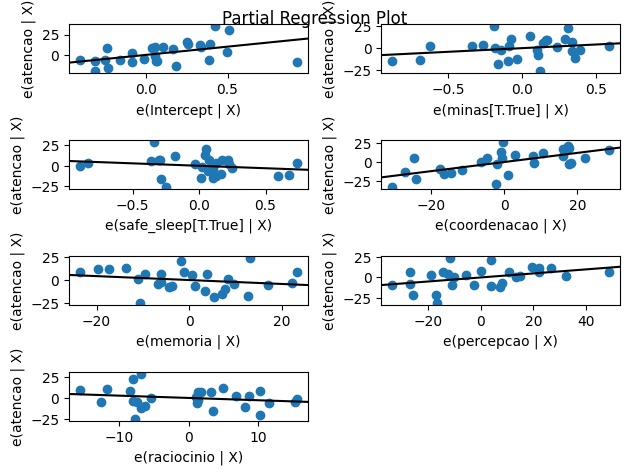

In [ ]:
fig = plot_partregress_grid(results)

In [ ]:
X = df_full[['coordenacao', 'memoria', 'percepcao', 'raciocinio', 'minas', 'safe_sleep']]
X = np.hstack([np.ones((X.shape[0], 1)), X.values])

y_pred = model.predict(results.params)

y_true = df_full['atencao'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers'))
fig.add_trace(go.Scatter(x=y_true, y=y_true, mode='lines'))
fig.update_layout(title='Atenção', xaxis_title='Real', yaxis_title='Predito')
fig.show()

c:\Users\lagua\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:812: RuntimeWarning:

divide by zero encountered in log

c:\Users\lagua\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1806: RuntimeWarning:

invalid value encountered in double_scalars



                 Generalized Linear Model Regression Results                  
Dep. Variable:              percepcao   No. Observations:                   28
Model:                            GLM   Df Residuals:                       21
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                         0.20771
Method:                          IRLS   Log-Likelihood:                    inf
Date:                Mon, 26 Jun 2023   Deviance:                       73.700
Time:                        11:05:16   Pearson chi2:                     4.36
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.9351      0

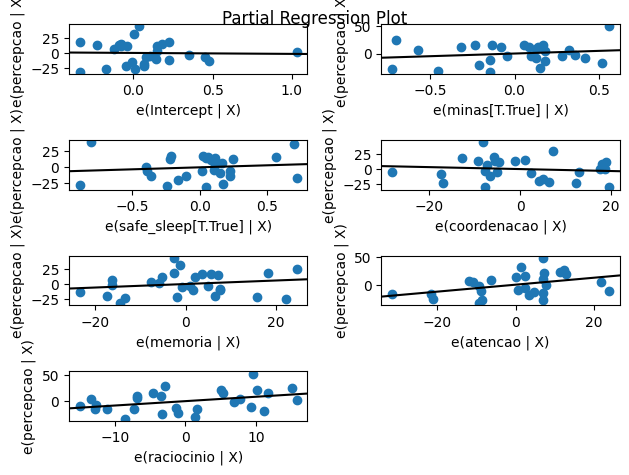

In [ ]:
# Para percepção
model = smf.glm(formula='percepcao ~ coordenacao + memoria + atencao + raciocinio + minas + safe_sleep', data=df_full, family=sm.api.families.Gamma(link=sm.api.families.links.Log()))
results = model.fit()
print(results.summary())

fig = plot_partregress_grid(results)

y_pred = model.predict(results.params)

y_true = df_full['percepcao'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers'))
fig.add_trace(go.Scatter(x=y_true, y=y_true, mode='lines'))
fig.update_layout(title='Percepção', xaxis_title='Real', yaxis_title='Predito')
fig.show()

In [ ]:
# calula AIC do modelo
print(results.aic)

-inf


                 Generalized Linear Model Regression Results                  
Dep. Variable:                memoria   No. Observations:                   28
Model:                            GLM   Df Residuals:                       21
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                         0.17862
Method:                          IRLS   Log-Likelihood:                -115.31
Date:                Mon, 26 Jun 2023   Deviance:                       6.6131
Time:                        11:04:07   Pearson chi2:                     3.75
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4262
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.5881      0

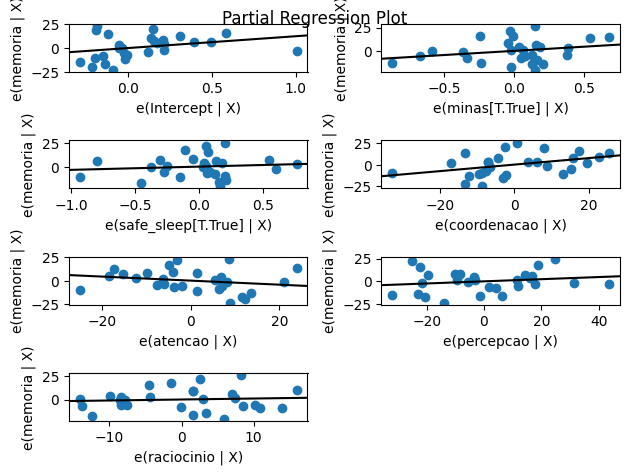

In [ ]:
# Para memória
model = smf.glm(formula='memoria ~ coordenacao + atencao + percepcao + raciocinio + minas + safe_sleep', data=df_full, family=sm.api.families.Gamma(link=sm.api.families.links.Log()))
results = model.fit()
print(results.summary())

fig = plot_partregress_grid(results)
y_pred = model.predict(results.params)
y_true = df_full['percepcao'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers'))
fig.add_trace(go.Scatter(x=y_true, y=y_true, mode='lines'))
fig.update_layout(title='Memória', xaxis_title='Real', yaxis_title='Predito')
fig.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:             raciocinio   No. Observations:                   28
Model:                            GLM   Df Residuals:                       21
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                         0.37493
Method:                          IRLS   Log-Likelihood:                -117.98
Date:                Mon, 26 Jun 2023   Deviance:                       28.648
Time:                        11:07:52   Pearson chi2:                     7.87
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2302
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.1335      0

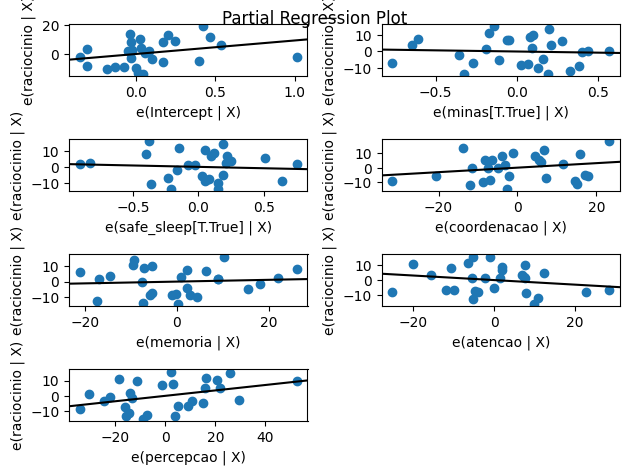

In [ ]:
# Para raciocínio
df_full['raciocinio'] = df_full['raciocinio'].apply(lambda x: x if x > 0 else 0.0001)
model = smf.glm(formula='raciocinio ~ coordenacao + memoria + atencao + percepcao + minas + safe_sleep', data=df_full, family=sm.api.families.Gamma(link=sm.api.families.links.Log()))
results = model.fit()
print(results.summary())

fig = plot_partregress_grid(results)

y_pred = model.predict(results.params)

y_true = df_full['raciocinio'].values

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode='markers'))
fig.add_trace(go.Scatter(x=y_true, y=y_true, mode='lines'))
fig.update_layout(title='Raciocínio', xaxis_title='Real', yaxis_title='Predito')
fig.show()

In [ ]:
print(results.deviance)

28.6478845888068


In [ ]:
# get the email of the user with the best score for each game

for game in GAMES:
    df_game = df[df[game] == df[game].max()]
    print(game, ": ", end='')
    print(df_game['email'].values[0])

Atenção : rafafa@maildrop.cc
Coordenação : laguardia42@maildrop.cc
Memória : falqueto@maildrop.cc
Percepção : jotta@maildrop.cc
Raciocínio : falqueto@maildrop.cc


In [62]:
df.drop(df[df['idade'] < 10].index, inplace=True)
df.drop(df[df['idade'] > 50].index, inplace=True)
np.var(df['idade'])

2.962799167533819

In [63]:
df['fgv'].mean()

0.6612903225806451